#▶Imports

In [48]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#▶Dataset Loading

In [ ]:
!unzip '/content/titanic.zip'

In [ ]:
#load data
titanic_data=pd.read_csv('/content/train.csv')

In [ ]:
#count the numbe rof rows and column in the dataset
titanic_data.head(5)

In [ ]:
#no of rows n columns
titanic_data.shape

(891, 12)

In [ ]:
#more infro about the data
titanic_data.info()

In [ ]:
#check number of missing columns
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#▶DataPreprocessing

In [ ]:
#drop the cabin columns
titanic_data=titanic_data.drop(columns="Cabin",axis=1)

In [ ]:
#replacing the  issing values in age columns with mean age value
titanic_data["Age"].fillna(titanic_data["Age"].mean(),inplace=True)

In [ ]:
#finding mode value of embarked column
print(titanic_data["Embarked"].mode()[0])

S


In [ ]:
#replacing the missing values in embark column with mode value
titanic_data["Embarked"].fillna(titanic_data["Embarked"].mode()[0],inplace=True)

In [ ]:
titanic_data.isnull().sum()

#▶Data Analysis

In [ ]:
#getting some statistical measures about the data
titanic_data.describe()

In [ ]:
#finding the number of people survived and not survived
titanic_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#▶Data Vizualization

In [ ]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

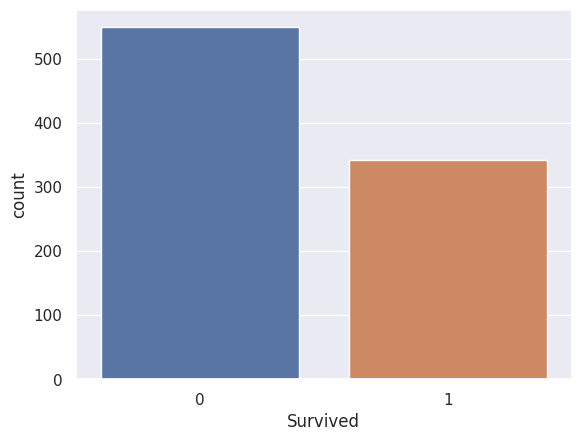

In [ ]:
#making a count plot for survived columns
sns.countplot(x='Survived',data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

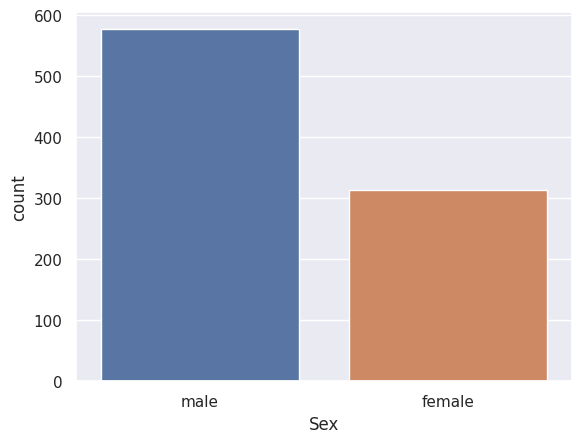

In [ ]:
#making a count plot for survived columns
sns.countplot(x='Sex',data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

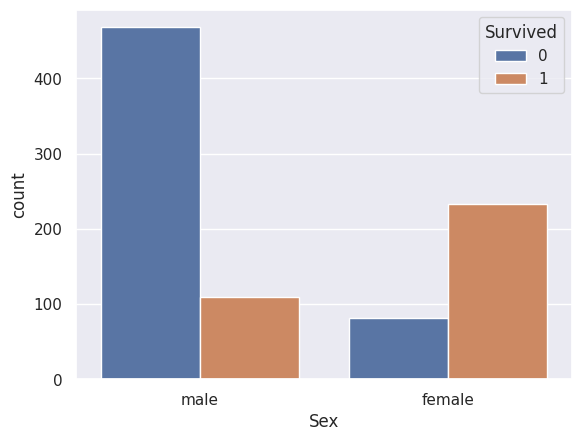

In [ ]:
#number of survivors gender vise
sns.countplot(x='Sex', hue='Survived', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

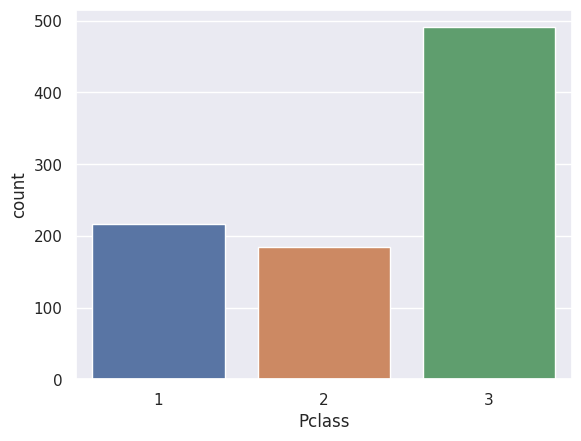

In [ ]:
#making a count plot for survived columns
sns.countplot(x='Pclass',data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

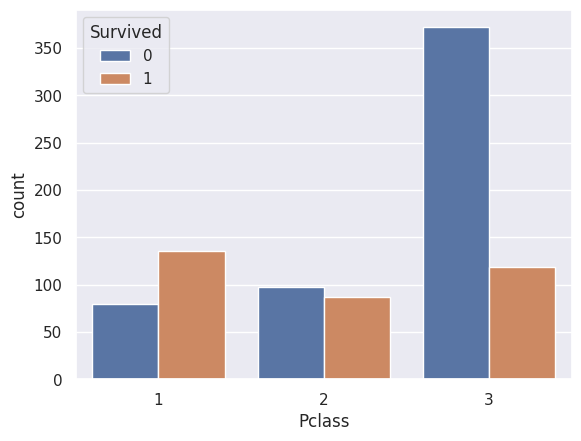

In [ ]:
#number of survivors gender vise
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)

#▶Encoding Categrical Column

In [ ]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
#converting categorical columns

titanic_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


#▶Supporting Features and Target

In [ ]:
X=titanic_data.drop(columns=['PassengerId','Name','Ticket','Survived'], axis=1)
Y=titanic_data['Survived']

print(X)
print(Y)

#▶ Splitting Data into Training and Test

In [49]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [50]:
print(X.shape,X_train.shape,X_test.shape)

(891, 7) (712, 7) (179, 7)


#▶Model Training

In [51]:
#Scale the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [52]:
#create a function with amny ml models
def models(X_train, Y_train):
  #Use Logistic Regression
  from sklearn.linear_model import LogisticRegression 
  log=LogisticRegression(random_state=0)
  log.fit(X_train,Y_train)

  #Use Neighbours
  from sklearn.neighbors import KNeighborsClassifier
  knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski', p=2)
  knn.fit(X_train,Y_train)

  #Use SVC (linear kernel)
  from sklearn.svm import SVC
  svc_lin=SVC(kernel='linear', random_state=0)
  svc_lin.fit(X_train,Y_train)

  #Use SVC (RBF kernel)
  from sklearn.svm import SVC
  svc_rbf=SVC(kernel='rbf', random_state=0)
  svc_rbf.fit(X_train,Y_train)

  #Use GaussianNB
  from sklearn.naive_bayes import GaussianNB
  gauss=GaussianNB()
  gauss.fit(X_train,Y_train)

  #Use Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
  tree.fit(X_train,Y_train)

  #Use RandomForestClassifier
  from sklearn.ensemble import RandomForestClassifier
  forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
  forest.fit(X_train,Y_train)

  #Print training accuracy for each model
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train,Y_train))
  print('[1]K Neighbors Training Accuracy:', knn.score(X_train,Y_train))
  print('[2]SVC Linear Training Accuracy:', svc_lin.score(X_train,Y_train))
  print('[3]SVC rbf Training Accuracy:', svc_rbf.score(X_train,Y_train))
  print('[4]Gaussian NB Training Accuracy:', gauss.score(X_train,Y_train))
  print('[5]Decision Tree Training Accuracy:', tree.score(X_train,Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train,Y_train))
 
  return log,knn,svc_lin,svc_rbf,gauss,tree,forest

In [53]:
#Get and train all models
model=models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.8089887640449438
[1]K Neighbors Training Accuracy: 0.8637640449438202
[2]SVC Linear Training Accuracy: 0.800561797752809
[3]SVC rbf Training Accuracy: 0.8567415730337079
[4]Gaussian NB Training Accuracy: 0.7935393258426966
[5]Decision Tree Training Accuracy: 0.9859550561797753
[6]Random Forest Classifier Training Accuracy: 0.9747191011235955


#▶Prediction and Accuracy

In [54]:
#show the confudion matrix and accuracy
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
  cm=confusion_matrix(Y_test,model[i].predict(X_test))

  #Extract TN, FP,FN, TP
  TN, FP, FN, TP=confusion_matrix(Y_test,model[i].predict(X_test)).ravel()
  
  test_score = (TP+TN)/(TP+TN+FN+FP)
  print(cm)
  print('Model[{}] Testing Accuracy = "{}"'.format(i,test_score))
  print()

[[88 12]
 [28 51]]
Model[0] Testing Accuracy = "0.776536312849162"

[[94  6]
 [35 44]]
Model[1] Testing Accuracy = "0.770949720670391"

[[89 11]
 [31 48]]
Model[2] Testing Accuracy = "0.7653631284916201"

[[94  6]
 [34 45]]
Model[3] Testing Accuracy = "0.776536312849162"

[[86 14]
 [29 50]]
Model[4] Testing Accuracy = "0.7597765363128491"

[[88 12]
 [28 51]]
Model[5] Testing Accuracy = "0.776536312849162"

[[89 11]
 [32 47]]
Model[6] Testing Accuracy = "0.7597765363128491"



In [56]:
#Get Feature Importance
forest=model[6]
importances=pd.DataFrame({'feature': titanic_data.iloc[:,1:8].columns,'importance':np.round(forest.feature_importances_,3)})
importanes=importances.sort_values('importance',ascending=False).set_index('feature')
importances

,feature,importance
0,Survived,0.074
1,Pclass,0.215
2,Name,0.278
3,Sex,0.051
4,Age,0.048
5,SibSp,0.295
6,Parch,0.039


<Axes: >

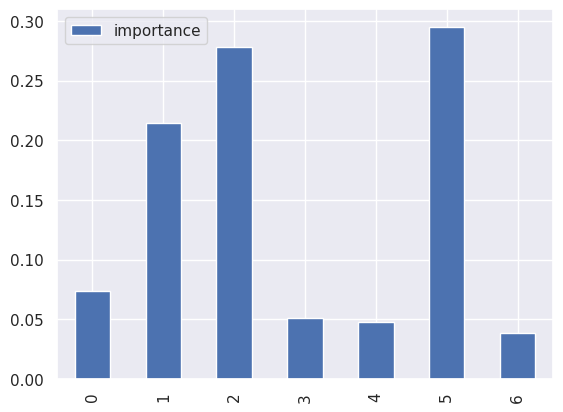

In [57]:
#vizualize the importance
importances.plot.bar()

In [62]:
#print the prediction of Random forest classifier
pred=model[6].predict(X_test)
print(pred)

print()
#Print actual values
print(model[6].predict(X_test))

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0
 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0
 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1]

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0
 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0
 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1]
